In [1]:
import tensorflow
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [2]:
len(train_labels[train_labels == 1])

12500

In [4]:
#augmentation:
#augmentation means making a copy of 1 image in to more than one image and changing its pixels

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
max([max(sequence) for sequence in train_data])

9999

In [7]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [9]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [10]:
                #one hot encode
    
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [12]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [13]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [14]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

In [16]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [17]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 408us/sample - loss: 0.5037 - accuracy: 0.7934 - val_loss: 0.3776 - val_accuracy: 0.8774
Epoch 2/20
15000/15000 [==============================] - 3s 226us/sample - loss: 0.3018 - accuracy: 0.9030 - val_loss: 0.3218 - val_accuracy: 0.8712
Epoch 3/20
15000/15000 [==============================] - 3s 221us/sample - loss: 0.2245 - accuracy: 0.9278 - val_loss: 0.3033 - val_accuracy: 0.8789
Epoch 4/20
15000/15000 [==============================] - 3s 216us/sample - loss: 0.1780 - accuracy: 0.9425 - val_loss: 0.2877 - val_accuracy: 0.8852
Epoch 5/20
15000/15000 [==============================] - 3s 209us/sample - loss: 0.1480 - accuracy: 0.9518 - val_loss: 0.2801 - val_accuracy: 0.8871
Epoch 6/20
15000/15000 [==============================] - 3s 212us/sample - loss: 0.1190 - accuracy: 0.9654 - val_loss: 0.2906 - val_accuracy: 0.8875
Epoch 7/20
15000/15000 [==========================

In [18]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

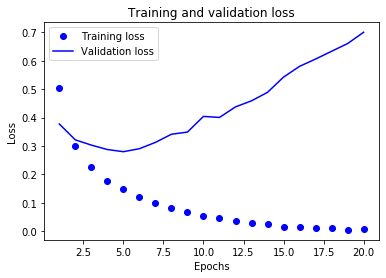

In [21]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')  #b = blue, o = cirrcular
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

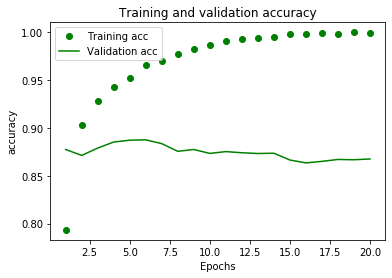

In [22]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'go', label='Training acc')
plt.plot(epochs, val_acc_values, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [27]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=6, batch_size=512, verbose=1)
results = model.evaluate(x_test, y_test)

Train on 25000 samples
Epoch 1/6
25000/25000 [==============================] - 5s 188us/sample - loss: 0.4486 - accuracy: 0.8213
Epoch 2/6
25000/25000 [==============================] - 3s 136us/sample - loss: 0.2541 - accuracy: 0.9097
Epoch 3/6
25000/25000 [==============================] - 3s 136us/sample - loss: 0.1943 - accuracy: 0.9302
Epoch 4/6
25000/25000 [==============================] - 3s 135us/sample - loss: 0.1642 - accuracy: 0.9404
Epoch 5/6
25000/25000 [==============================] - 3s 136us/sample - loss: 0.1398 - accuracy: 0.9515
Epoch 6/6
25000/25000 [==============================] - 4s 141us/sample - loss: 0.1224 - accuracy: 0.9566
25000/1 [======================================================================================================================================================================================================================================================================================================================================

In [28]:
results

[0.34402423927783965, 0.875]